# Visualizations of pFC PCR and pFC9 digest agarose gel DNA extraction results

In [1]:
import pandas as pd
import rpy2
%load_ext rpy2.ipython

Read dataframe with nanodrop results.

In [2]:
nanodrop = pd.read_csv('../tables/nanodrop_pFC_pcrs_and_digests.csv', sep='|')  # pipe delim due to markdown

Clean data.

In [3]:
nanodrop_trim = nanodrop.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
nanodrop_trim

,Sample name,Sample number,ng/ul,260/280,260/230,Date,Assay
0,pFC8tac (EH),1,12.2,1.820,-0.2550,08/04/21,PCR
1,pFC9 (EH),2,3.0,2.010,-0.0380,08/04/21,PCR
2,pFC8 (EH),3,1.2,3.700,-0.0100,08/04/21,PCR
3,pFC8T1T2 (RL),4,1.2,1.706,-0.0180,08/04/21,PCR
4,pFC8 (RL),5,-0.1,0.151,0.0020,08/04/21,PCR
5,pFC53(8)T1T2 (RL),6,2.2,1.823,-0.0370,08/04/21,PCR
6,pFC8T2 (RL),7,2.1,3.463,-0.0470,08/04/21,PCR
7,pFC8tac (EH),8,16.1,1.677,-0.3070,08/04/21,PCR
8,pFC8tac (EH),1,29.8,1.396,0.0042,08/03/21,PCR
9,pFC8tac (EH),2,77.3,2.781,0.0000,08/03/21,PCR


Plot data using ggplot2.

In [4]:
%%R -i nanodrop_trim
library(ggplot2)
library(ggpubr)
library(RColorBrewer)

colnames(nanodrop_trim)

[1] " Sample name       " " Sample number "     " ng/ul "            
[4] " 260/280 "           " 260/230 "           "Date"               
[7] "Assay"              


Format column names because they are wack.

In [5]:
%%R -i nanodrop_trim 
nano.df <- nanodrop_trim
colnames(nano.df) <- c(
    'Sample_name', 'Sample_number', 'ng_per_ul', 
    'protein_ratio', 'salt_ratio', 'Date', 'Assay'
)

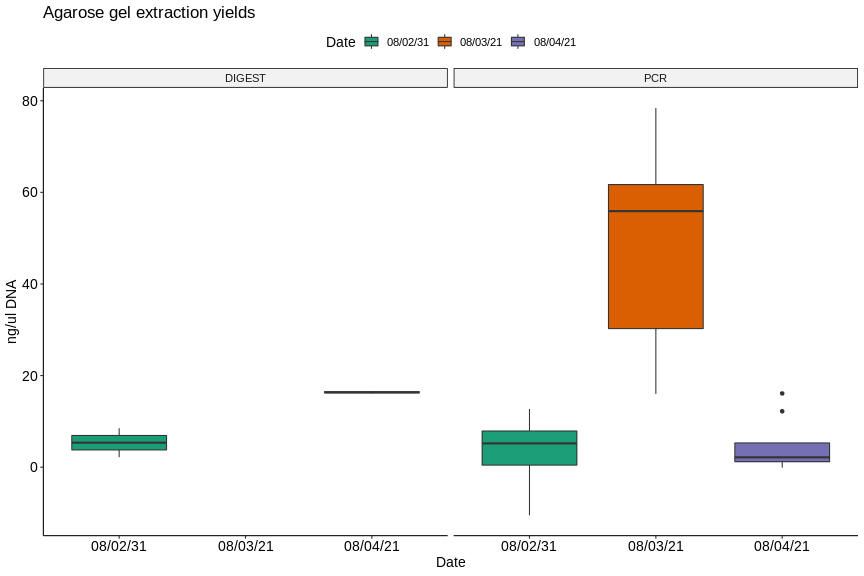

In [6]:
%%R -w 12 -h 8 --units in

ggplot(nano.df, aes(x=Date, y=ng_per_ul, fill=Date)) + geom_boxplot() + 
      facet_wrap(~Assay) + theme_pubr() + labs(
          y='ng/ul DNA', title='Agarose gel extraction yields'
      ) + scale_fill_brewer(palette='Dark2') +
      theme(text = element_text(size = 14))

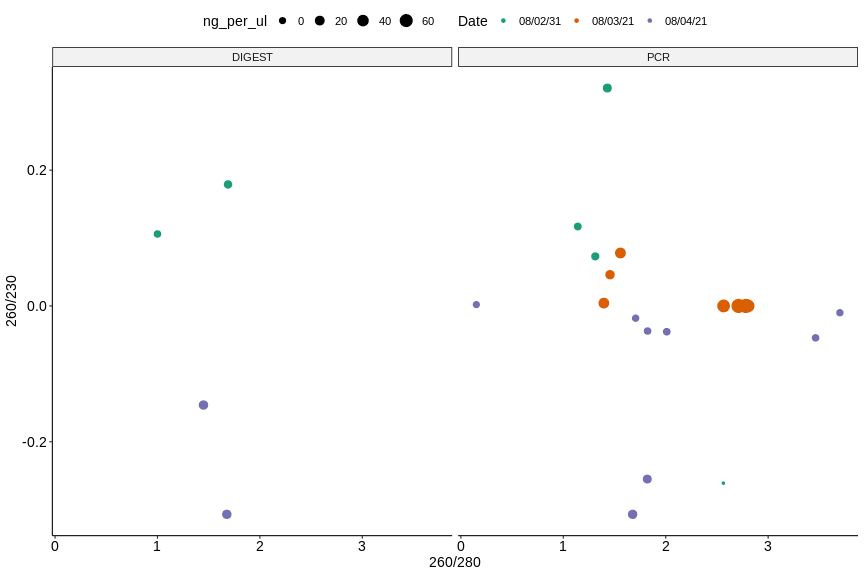

In [7]:
%%R -w 12 -h 8 --units in

# ideal protein ratio value = 1.8
# ideal salt ratio value >= 2 

# https://toptipbio.com/the-nanodrop-results-explained/


ratios <- ggplot(nano.df, aes(x=protein_ratio, y=salt_ratio, color=Date, size=ng_per_ul)) + 
    geom_point() +
    facet_wrap(~Assay) + theme_pubr() + 
    scale_color_brewer(palette='Dark2')  +
    labs(x='260/280', y='260/230') + theme(text = element_text(size = 14))
ratios

Overall shows both salt and protein contamination.

Add visualization of ideal ratio ranges.

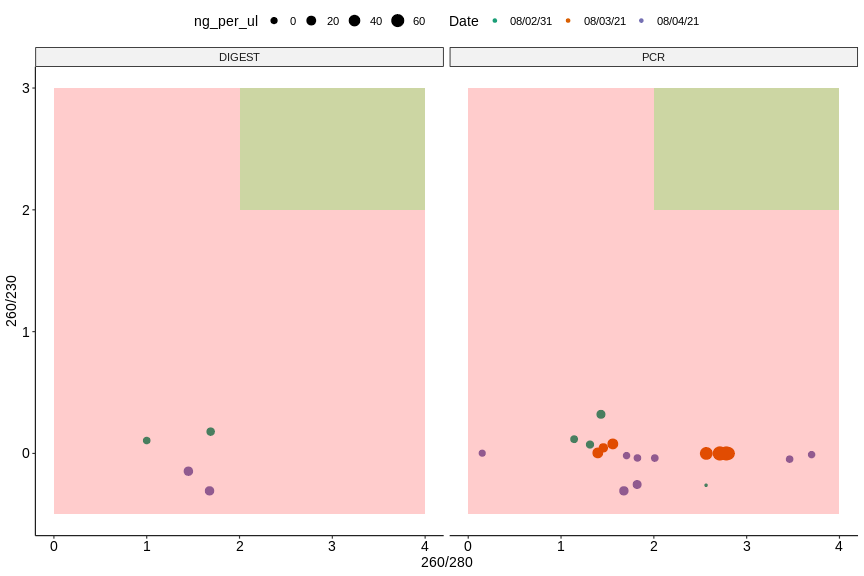

In [9]:
%%R -w 12 -h 8 --units in

ratios + annotate("rect", xmin = 0, xmax = 4, ymin = -0.5, ymax = 3,
                  alpha = .2, fill='red') + 
        annotate("rect", xmin = 2, xmax = 4, ymin = 2, ymax = 3,
                alpha = .2, fill='green')
        